In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_access = pd.read_csv("./dataset/ACCESS.csv")
df_local = pd.read_csv("./dataset/LOCAL.csv")
df_assist = pd.read_csv("./dataset/ASSISTANCE.csv")


In [3]:
df_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3143 non-null   int64  
 1   State                      3143 non-null   object 
 2   County                     3143 non-null   object 
 3   LACCESS_POP10              3143 non-null   float64
 4   LACCESS_POP15              3124 non-null   float64
 5   PCH_LACCESS_POP_10_15      3117 non-null   float64
 6   PCT_LACCESS_POP10          3143 non-null   float64
 7   PCT_LACCESS_POP15          3124 non-null   float64
 8   LACCESS_LOWI10             3143 non-null   float64
 9   LACCESS_LOWI15             3123 non-null   float64
 10  PCH_LACCESS_LOWI_10_15     3115 non-null   float64
 11  PCT_LACCESS_LOWI10         3143 non-null   float64
 12  PCT_LACCESS_LOWI15         3123 non-null   float64
 13  LACCESS_HHNV10             3143 non-null   float

In [4]:
df_access.describe()

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
count,3143.000000,3143.000000,3124.000000,3.117000e+03,3143.000000,3124.000000,3143.000000,3123.000000,3.115000e+03,3143.000000,...,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,30390.411709,20156.653242,19287.747386,7.180008e+03,23.559330,23.084470,5551.776559,5833.959524,7.318957e+03,8.374953,...,2326.081648,2.021269,695.064178,0.249350,230.259498,0.804746,32.204247,0.019207,1290.799156,1.154542
std,15164.717720,51308.865791,47803.525595,3.955676e+05,20.250176,19.602745,13862.922934,13989.348252,4.004692e+05,8.214988,...,12159.928409,5.030497,3466.438554,0.693856,1387.887687,4.835109,435.841952,0.134887,5414.425184,1.864479
min,1001.000000,0.000000,0.000000,-1.000000e+02,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18178.000000,1661.076793,1631.358726,-1.091343e+01,10.847099,10.927326,592.983070,608.235919,-1.232638e+01,3.442171,...,31.131894,0.197446,3.328667,0.027088,5.274117,0.026997,0.000000,0.000000,33.382261,0.221558
50%,29177.000000,4097.827186,4131.174278,-6.239322e-02,19.685956,19.200682,1500.780036,1636.858816,3.486028e+00,6.150772,...,136.051404,0.579669,16.473665,0.085588,20.850829,0.072033,1.000000,0.003242,132.098182,0.572597
75%,45082.000000,12954.123205,13119.029393,7.262080e+00,29.581054,28.862231,4591.067541,4859.016156,2.352342e+01,10.324935,...,874.891533,1.673132,130.916653,0.249311,101.353615,0.186646,7.107201,0.013054,658.924526,1.318699
max,56045.000000,886068.668400,740267.412700,2.208376e+07,100.000001,100.000001,292541.789000,259479.516000,2.234893e+07,72.274456,...,263440.500100,79.323968,76998.348560,25.087551,40350.800430,83.844210,21387.063060,4.469546,115781.021500,27.120652


In [5]:
cols = ["State", "County", "PCT_LACCESS_POP15", "PCT_LACCESS_LOWI15", "PCT_LACCESS_CHILD15", "PCT_LACCESS_SENIORS15", "PCT_LACCESS_SNAP15", "PCH_LACCESS_POP_10_15"]
rename = ["State", "County", "percent_low_access", "percent_lowia", "percent_low_child", "percent_low_seniors", "snap_low_access", "access_change"]

temp = df_access[cols]

temp.rename(columns=dict(zip(cols, rename)), inplace=True)

C:\Users\quang\AppData\Local\Temp\ipykernel_5088\2595983618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns=dict(zip(cols, rename)), inplace=True)


<Axes: >

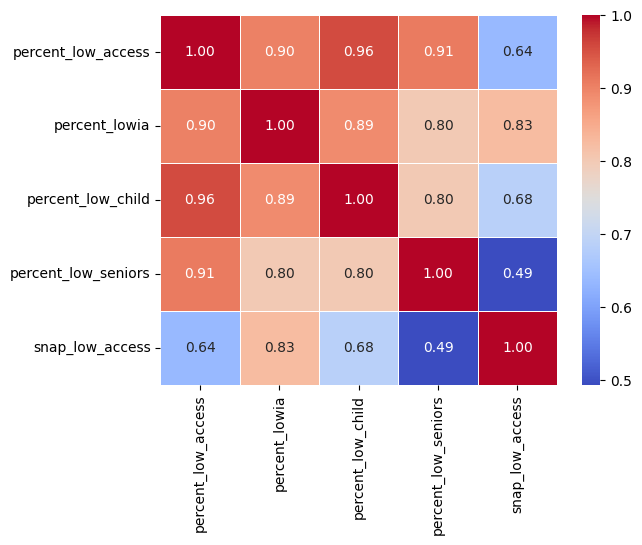

In [6]:
sorted = temp.groupby("County")["percent_low_access"].mean()

sorted_low_income = temp.groupby("County")["percent_lowia"].mean()



corr_matrix = temp[["percent_low_access", "percent_lowia", "percent_low_child", "percent_low_seniors", "snap_low_access"]].corr()

# print(sorted - sorted_low_income)
# print(sorted.mean())

sns.heatmap(
    corr_matrix,
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",       
    linewidths=0.5   
)

In [7]:
df_store = pd.read_csv("./dataset/STORES.csv")

store_count = df_store.groupby("County")[["SUPERCPTH16", "SUPERC16", "CONVS16", "GROC16", "CONVSPTH16"]].mean()

In [8]:
df_tax = pd.read_csv("./dataset/TAXES.csv")

tax_count = df_tax.groupby("County")[["FOOD_TAX14"]].mean()

In [9]:
df_socio = pd.read_csv("./dataset/SOCIOECONOMIC.csv")

socio_count = df_socio.groupby("County")[["MEDHHINC15", "POVRATE15","PCT_NHBLACK10",  "PCT_HISP10", "PCT_NHWHITE10", "PCT_NHASIAN10"]].mean()

In [10]:
df_health = pd.read_csv("./dataset/HEALTH.csv")

health_count = df_health.groupby("County")[["PCT_DIABETES_ADULTS13", "PCT_OBESE_ADULTS17"]].mean()

In [11]:
df_insecure = pd.read_csv("./dataset/INSECURITY.csv")

insecure_count = df_insecure.groupby("County")[["FOODINSEC_15_17", "VLFOODSEC_15_17"]].mean()

In [12]:
df_restaurant = pd.read_csv("./dataset/RESTAURANTS.csv")

restaurant_count_state = df_restaurant.groupby("County")[["FFR16", "FSR16"]].mean()
processed = pd.concat([restaurant_count_state, store_count, tax_count, health_count, insecure_count, sorted], axis=1)

processed.dropna(inplace=True)

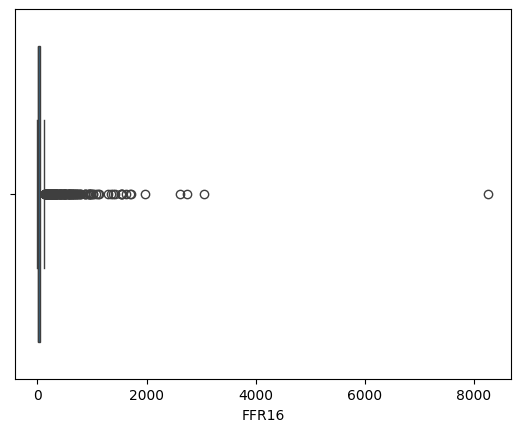

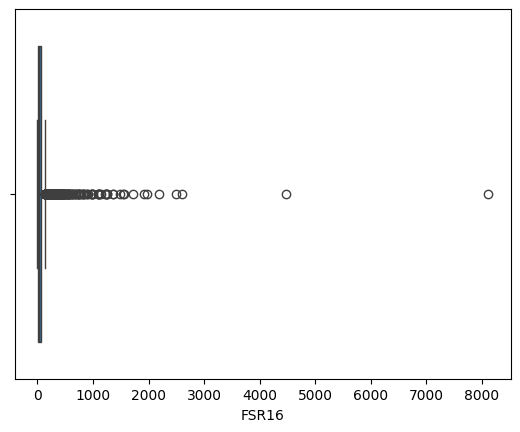

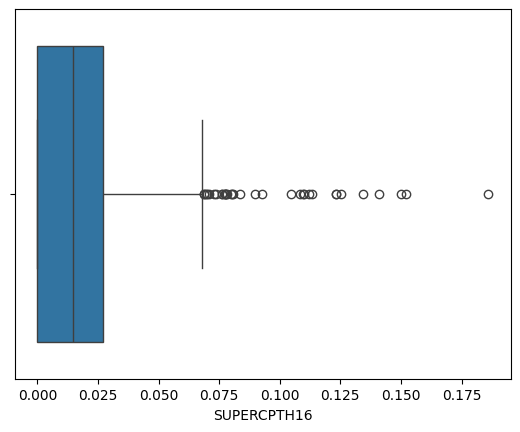

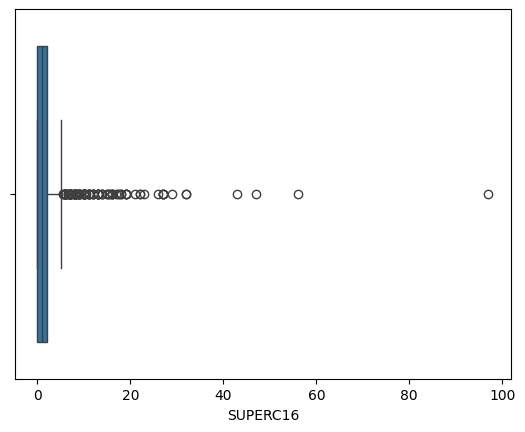

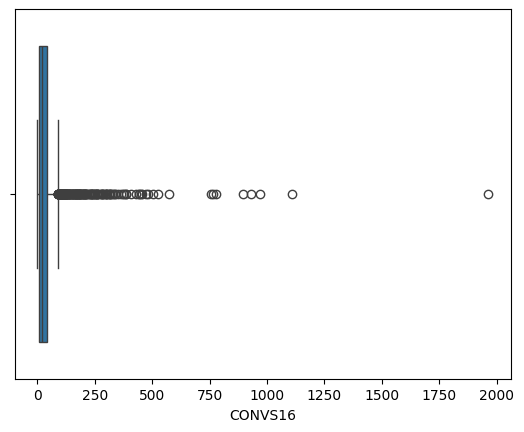

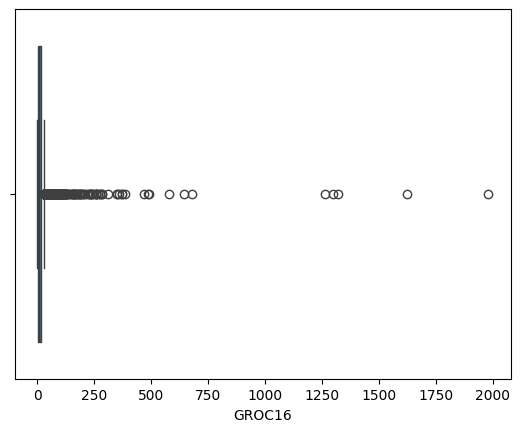

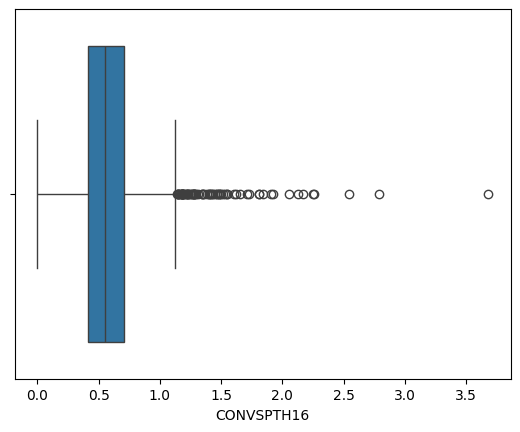

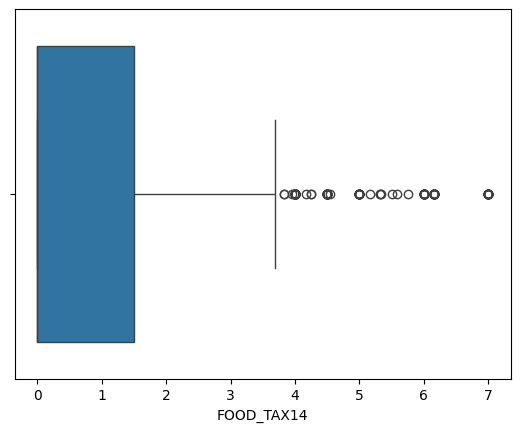

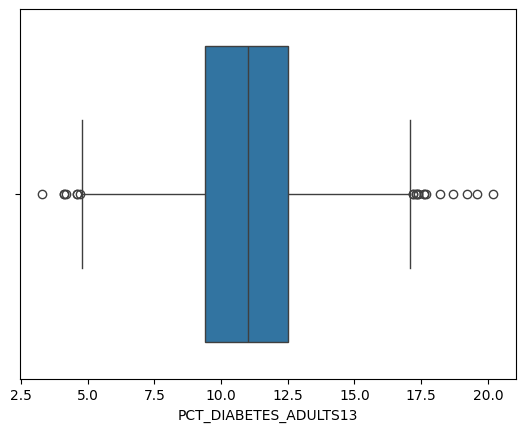

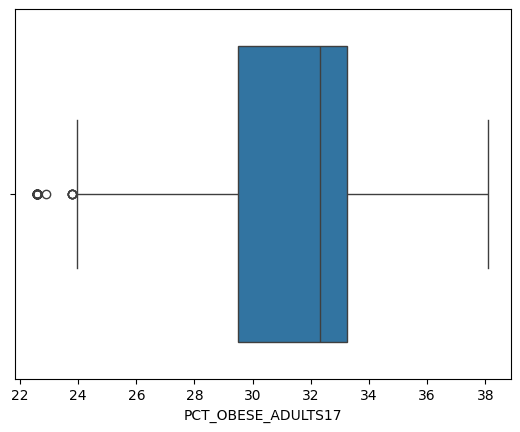

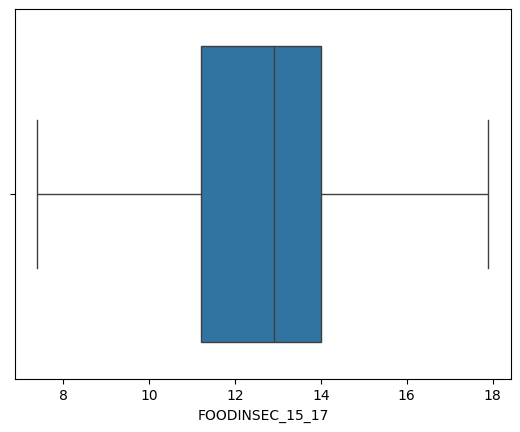

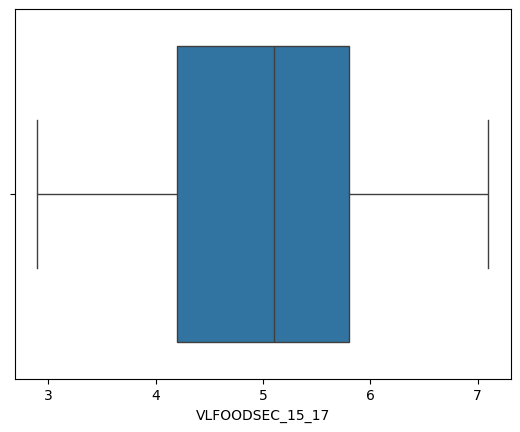

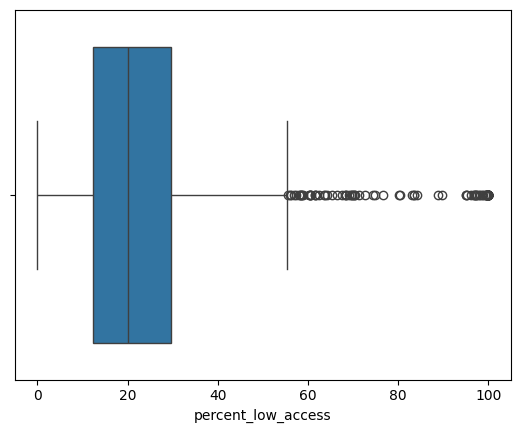

In [13]:
for col in processed.columns:
    sns.boxplot(x=processed[col])
    plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

scaler = StandardScaler()
sel = VarianceThreshold(threshold=0.001)

X = sel.fit_transform(scaler.fit_transform(processed[processed.columns[:-1]]))
y = processed[processed.columns[-1]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
# model = LinearRegression()
# model = RandomForestRegressor()
model = ExtraTreesRegressor(n_estimators=400 ,criterion="squared_error", verbose=1, bootstrap=True)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s


234.23457701479632
0.4105811353619776


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [20]:
df_restaurant.head()
df_store.head()

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
0,1001,AL,Autauga,5,3,-40.000000,0.090581,0.054271,-40.085748,1,...,19.376392,0.674004,0.804747,19.397900,5.0,5.0,0.000000,0.090567,0.090511,-0.061543
1,1003,AL,Baldwin,27,29,7.407407,0.144746,0.139753,-3.449328,6,...,36.927711,0.725055,0.890836,22.864524,26.0,28.0,7.692307,0.139380,0.134802,-3.284727
2,1005,AL,Barbour,6,4,-33.333333,0.219370,0.155195,-29.254287,0,...,3.349282,1.280590,1.424614,11.246689,7.0,6.0,-14.285714,0.255942,0.232387,-9.203081
3,1007,AL,Bibb,6,5,-16.666667,0.263794,0.220916,-16.254289,1,...,11.794872,0.719122,0.801423,11.444711,6.0,5.0,-16.666666,0.263771,0.221474,-16.035471
4,1009,AL,Blount,7,5,-28.571429,0.121608,0.086863,-28.571429,1,...,5.701754,0.657144,0.692374,5.361034,8.0,8.0,0.000000,0.139000,0.139089,0.064332


<Axes: >

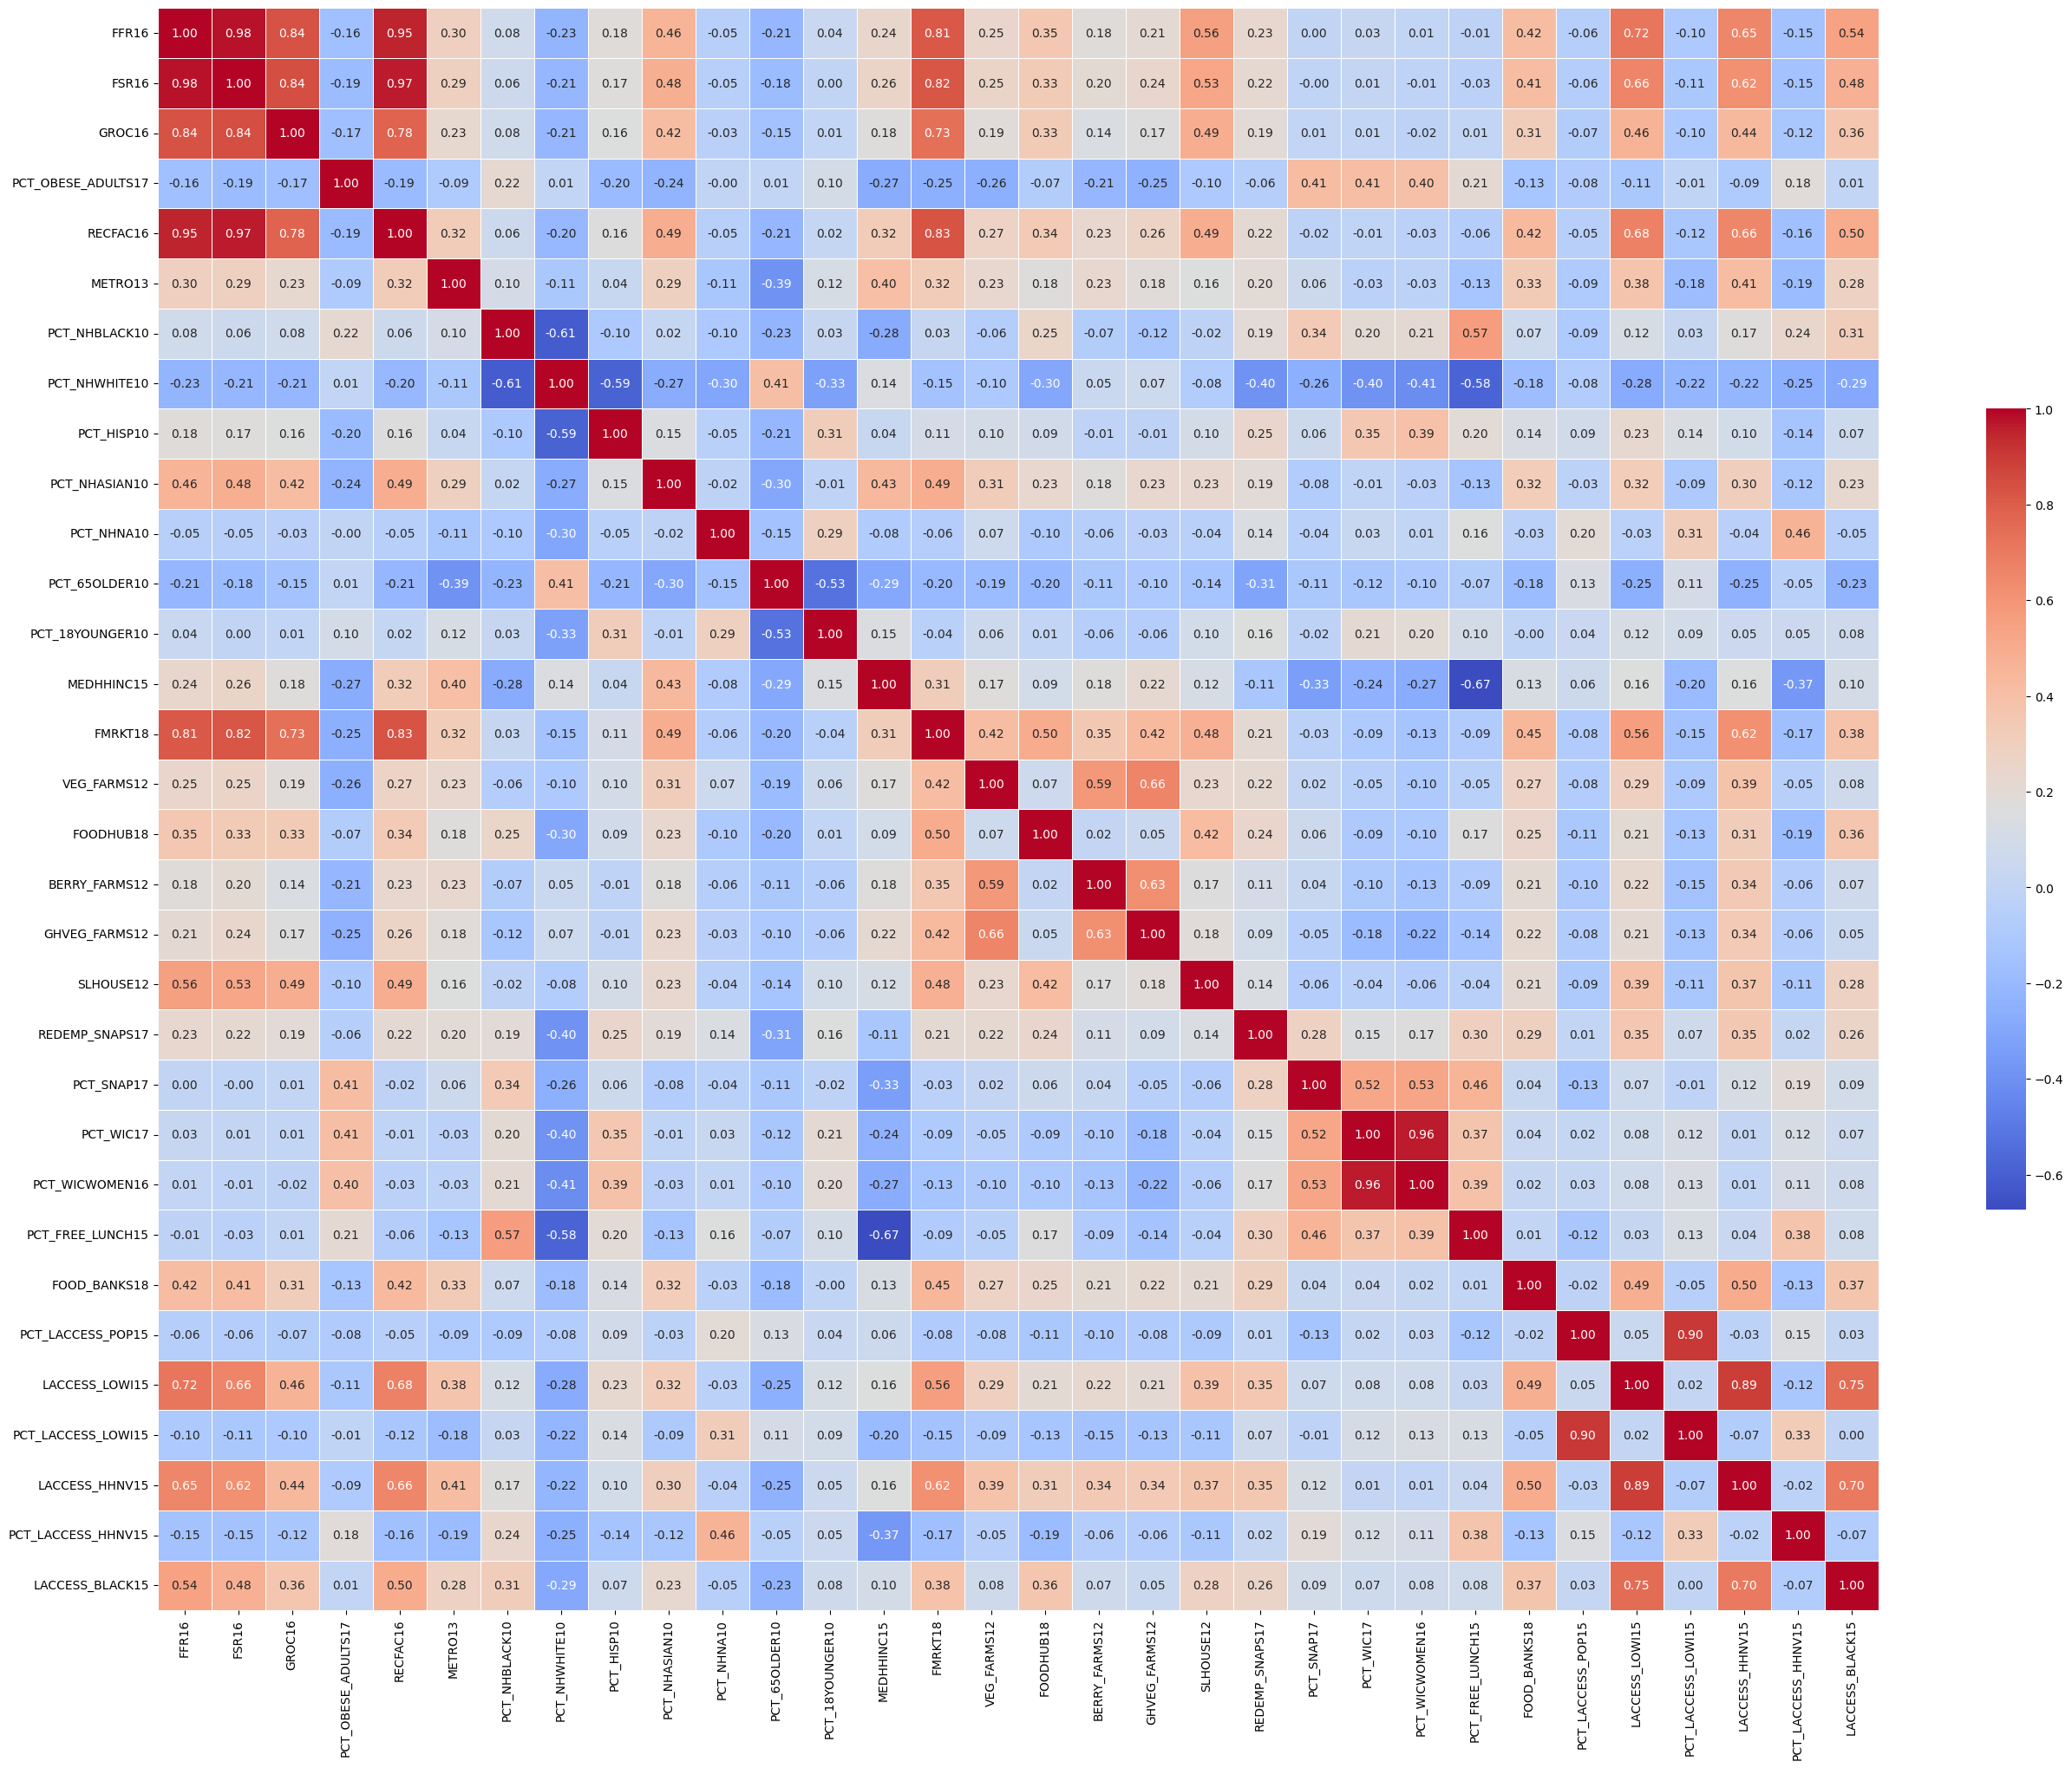

In [78]:
hstack = pd.merge(df_restaurant[["FIPS", "FFR16", "FSR16"]], df_store[["FIPS", "GROC16"]], on="FIPS", how="inner")
hstack = pd.merge(hstack, df_health[["FIPS", "PCT_OBESE_ADULTS17", "RECFAC16"]], on="FIPS", how="inner")
hstack = pd.merge(hstack, df_socio[["FIPS", "METRO13", "PCT_NHBLACK10", "PCT_NHWHITE10",  "PCT_HISP10", "PCT_NHASIAN10", "PCT_NHNA10",  "PCT_65OLDER10", "PCT_18YOUNGER10", "MEDHHINC15"]], on="FIPS", how="inner")
hstack = pd.merge(hstack, df_local[["FIPS", "FMRKT18",  "VEG_FARMS12", "FOODHUB18", "BERRY_FARMS12", "GHVEG_FARMS12", "SLHOUSE12"]], on="FIPS", how="inner")
hstack = pd.merge(hstack, df_assist[["FIPS", "REDEMP_SNAPS17",  "PCT_SNAP17", "PCT_WIC17", "PCT_WICWOMEN16", "PCT_FREE_LUNCH15",  "FOOD_BANKS18"]], on="FIPS", how="inner")
hstack = pd.merge(hstack, df_access[["FIPS", "PCT_LACCESS_POP15", "LACCESS_LOWI15", "PCT_LACCESS_LOWI15", "LACCESS_HHNV15", "PCT_LACCESS_HHNV15", "LACCESS_BLACK15"]], on="FIPS", how="inner")

corr_matrix = hstack.drop(columns=["FIPS"]).corr()

# Make font smaller
plt.figure(figsize=(32, 24))

sns.heatmap( corr_matrix, annot=True, 
    cmap='coolwarm', 
    fmt=".2f",       
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)


0       1
1       1
2       0
3       1
4       1
       ..
3138    0
3139    0
3140    0
3141    0
3142    0
Name: METRO13, Length: 3143, dtype: int64